# Laboratorio 1 Data Science
- Diego Linares #221256
- José Prince #22087


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
archivo = "dataset/Estadisticas_historicas_comercializacion.xlsx"

df_importacion = pd.read_excel(archivo, sheet_name="IMPORTACION", skiprows=6, nrows=289 )
df_consumo = pd.read_excel(archivo, sheet_name="CONSUMO", skiprows=6, nrows=301 ) 
#Aca arriba lo que hicimos fue leer los archivos de excel y saltar las primeras 6 filas que son encabezados y no nos interesan.
#Tambien especificamos el numero de filas que queremos leer, en este caso 289 para importacion y 301 para consumo.

# Renombrar columnas para facilitar
cols_import = df_importacion.columns.tolist()
cols_consumo = df_consumo.columns.tolist()

print("Columnas Importación:")
print(cols_import)

print("\nColumnas Consumo:")
print(cols_consumo)

Columnas Importación:
['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas', 'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido', 'Total importación']

Columnas Consumo:
['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gas natural', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas', 'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'Orimulsión', 'Total']


Bien logramos identificar las columnas importantes ahora vamos a solo a agarrar las que nos interesan. 

In [8]:
df_importacion = df_importacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']]
df_consumo = df_consumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']]


Vamos a analizar como viene formateada la fecha.. 

In [17]:
print(df_importacion['Fecha'].head())

0   2001-01-01
1   2001-02-01
2   2001-03-01
3   2001-04-01
4   2001-05-01
Name: Fecha, dtype: datetime64[ns]


MMm es tipo object asi que la vamos a transformar a datetime

In [18]:
df_importacion['Fecha'] = pd.to_datetime(df_importacion['Fecha'])
df_consumo['Fecha'] = pd.to_datetime(df_consumo['Fecha'])

In [19]:
print(df_importacion['Fecha'].dtype)


datetime64[ns]


Ya que trabajaremos series de tiempo, conviene que Fecha sea el índice del dataframe:

In [20]:
df_importacion.set_index('Fecha', inplace=True)
df_consumo.set_index('Fecha', inplace=True)


In [21]:
print("Importación:")
print(f"Inicio: {df_importacion.index.min()}")
print(f"Fin: {df_importacion.index.max()}")
print(f"Número de registros: {len(df_importacion)}")

print("\nConsumo:")
print(f"Inicio: {df_consumo.index.min()}")
print(f"Fin: {df_consumo.index.max()}")
print(f"Número de registros: {len(df_consumo)}")


Importación:
Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Número de registros: 288

Consumo:
Inicio: 2000-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Número de registros: 300


## Análisis exploratorio

Ya que tenemos los datasets limpios, vamos a realizar un analisis univariado para cada uno de los datasets que tenemos. Primero seria buenos analizar las estadísticas descriptivas que tenemos para nuestros datasets:

In [9]:
print(df_importacion.describe())

                     Fecha  Gasolina regular  Gasolina superior  \
count                  288      2.880000e+02       2.880000e+02   
mean   2012-12-15 17:00:00      4.129493e+05       4.909544e+05   
min    2001-01-01 00:00:00      8.101530e+04       1.702925e+05   
25%    2006-12-24 06:00:00      2.082069e+05       3.693299e+05   
50%    2012-12-16 12:00:00      3.275593e+05       4.813002e+05   
75%    2018-12-08 18:00:00      5.761171e+05       6.083053e+05   
max    2024-12-01 00:00:00      1.141366e+06       1.227174e+06   
std                    NaN      2.432627e+05       1.565581e+05   

       Diesel alto azufre  
count        2.880000e+02  
mean         5.541217e+05  
min          0.000000e+00  
25%          0.000000e+00  
50%          6.380928e+05  
75%          8.447706e+05  
max          1.595699e+06  
std          4.097571e+05  


A partir del análisis estadístico descriptivo del dataset **df_importacion**, se observa que el volumen promedio de importación de combustibles ha sido mayor para el diésel alto azufre (554,121 unidades), seguido de la gasolina superior (490,954) y la gasolina regular (412,949). La dispersión es más significativa en el caso del diésel, con una desviación estándar de más de 400,000 unidades, y se evidencia una asimetría en la distribución, ya que el 25% de los valores de diésel son exactamente cero, indicando largos periodos sin importación de este tipo de combustible**. En cambio, las gasolinas presentan una distribución más regular, aunque también con diferencias marcadas entre los valores mínimos y máximos, lo que sugiere fluctuaciones importantes en los volúmenes de importación a lo largo del tiempo.


In [10]:
print(df_consumo.describe())

                     Fecha  Gasolina regular  Gasolina superior  \
count                  300        300.000000         300.000000   
mean   2012-06-16 02:14:24     397478.894458      470248.678849   
min    2000-01-01 00:00:00     160741.900000      300242.781667   
25%    2006-03-24 06:00:00     215650.312917      383931.904375   
50%    2012-06-16 00:00:00     288193.130000      423319.540000   
75%    2018-09-08 12:00:00     548073.682500      573704.195000   
max    2024-12-01 00:00:00     938086.570000      786598.120000   
std                    NaN     219102.049432      113504.653305   

       Diesel alto azufre  
count        3.000000e+02  
mean         5.144313e+05  
min          0.000000e+00  
25%          0.000000e+00  
50%          6.721700e+05  
75%          7.791021e+05  
max          1.149175e+06  
std          3.688977e+05  


El análisis descriptivo del dataset **df_consumo** revela que, en promedio, el diésel alto azufre es el combustible más consumido (514,431 unidades), seguido de la gasolina superior (470,249) y la gasolina regular (397,479). Al igual que en las importaciones, el diésel presenta una alta variabilidad (desviación estándar de \~368,898) y un valor mínimo de consumo de cero, lo cual sugiere periodos sin uso reportado o una posible ausencia en el suministro. En cuanto a las gasolinas, el consumo es más estable y continuo, con menores desviaciones y valores mínimos significativamente más altos que los del diésel. Esto indica que, aunque el consumo de gasolina varía con el tiempo, no presenta interrupciones bruscas como el diésel. Además, los valores máximos de consumo de gasolina regular y superior (938,086 y 786,598 respectivamente) evidencian eventos de alta demanda, posiblemente asociados a factores estacionales o económicos.


Ya que tenemos la información inicial sobre como es la data que se tiene en cada uno de los datasets ahora se visualizara la data en histogramas para analizar su comportamiento.

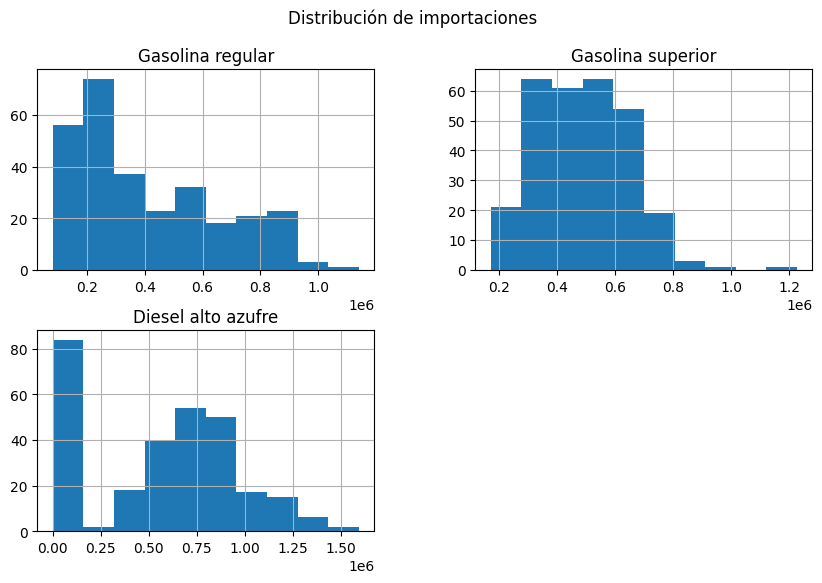

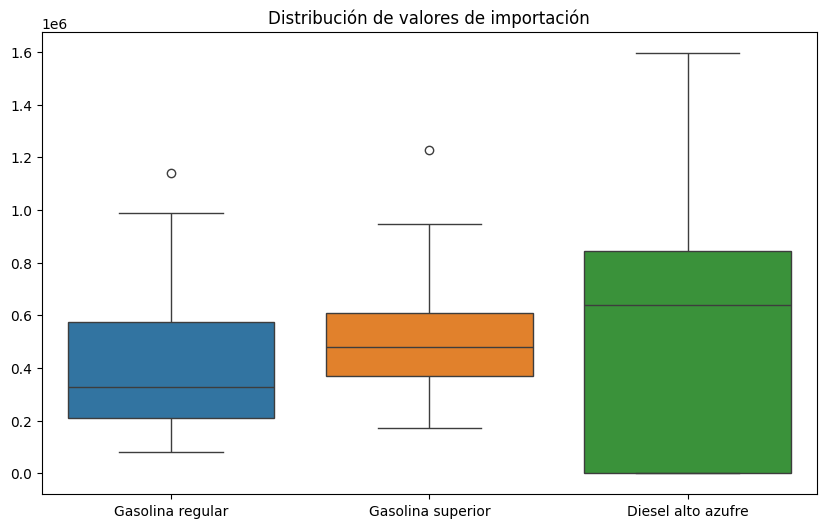

In [11]:
# Histograma de importación
df_importacion[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].hist(figsize=(10, 6))
plt.suptitle("Distribución de importaciones")
plt.show()

# Boxplot para ver outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_importacion.drop(columns='Fecha'))
plt.title("Distribución de valores de importación")
plt.show()

Los histogramas de "Gasolina regular", "Gasolina superior" y "Diesel alto azufre" muestran la distribución de la frecuencia de los valores de importación para cada tipo de combustible. Para la "Gasolina regular" y la "Gasolina superior", las distribuciones parecen estar sesgadas a la derecha, indicando que la mayoría de las importaciones son de menores volúmenes, con algunas importaciones de mayor volumen que se extienden hacia la derecha. El "Diesel alto azufre" también muestra un sesgo a la derecha, pero con un pico más pronunciado en los volúmenes más bajos, sugiriendo que las importaciones de diésel tienden a concentrarse aún más en cantidades pequeñas. Las escalas en el eje x, representadas en 106, indican que los volúmenes de importación son significativos.

El diagrama de cajas ("Distribución de valores de importación") ofrece una visión comparativa de la centralidad, dispersión y presencia de valores atípicos para los tres tipos de combustible. La "Gasolina regular" y la "Gasolina superior" tienen medianas y rangos intercuartílicos relativamente similares, aunque la "Gasolina superior" muestra una ligera tendencia a valores de importación un poco más altos en su mediana y tercer cuartil. En contraste, el "Diesel alto azufre" presenta una mediana y un rango intercuartílico considerablemente más elevados en comparación con las gasolinas, lo que sugiere que las importaciones de diésel tienden a ser en volúmenes mayores y con una mayor variabilidad en los cuartiles superiores. Los puntos individuales por encima de los bigotes en los diagramas de caja para "Gasolina regular" y "Gasolina superior" indican la presencia de valores atípicos (outliers), representando importaciones excepcionalmente grandes para esos combustibles. El "Diesel alto azufre", aunque con valores más altos, no muestra valores atípicos explícitos por encima del bigote superior dentro del rango visible, lo que podría indicar que sus valores máximos, aunque altos, están dentro de la distribución esperada para volúmenes grandes.

Ya que contamos con una analisis univariado seria bueno ahora analizar las variables de forma comparativa entre ambos datasets y analizar su comportamiento.

                               Fecha  Gasolina regular_import  \
Fecha                       1.000000                 0.891135   
Gasolina regular_import     0.891135                 1.000000   
Gasolina superior_import    0.702268                 0.788243   
Diesel alto azufre_import  -0.512830                -0.594085   
Gasolina regular_consumo    0.930666                 0.939163   
Gasolina superior_consumo   0.877600                 0.876826   
Diesel alto azufre_consumo -0.676965                -0.726859   

                            Gasolina superior_import  \
Fecha                                       0.702268   
Gasolina regular_import                     0.788243   
Gasolina superior_import                    1.000000   
Diesel alto azufre_import                  -0.325889   
Gasolina regular_consumo                    0.709164   
Gasolina superior_consumo                   0.756465   
Diesel alto azufre_consumo                 -0.496108   

                            Di

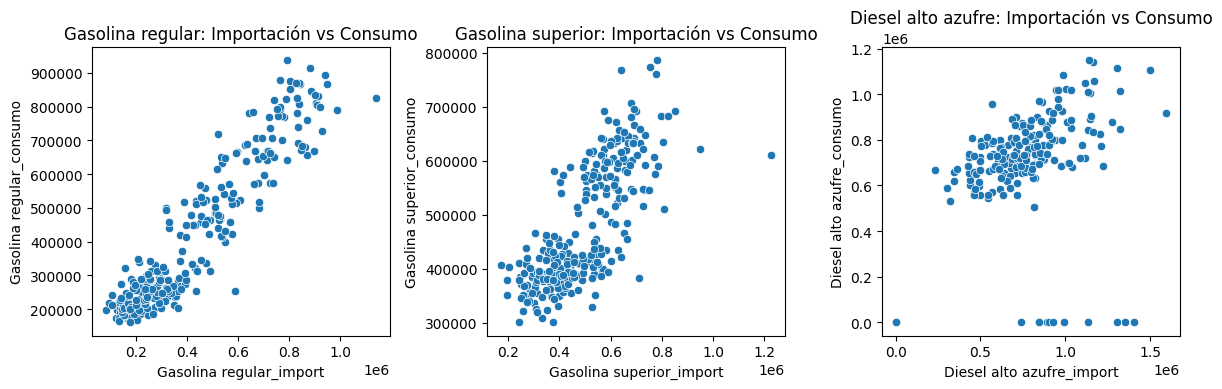

In [12]:
df_merged = pd.merge(df_importacion, df_consumo, on='Fecha', suffixes=('_import', '_consumo'))

# Correlación entre importación y consumo por tipo de combustible
print(df_merged.corr())

# Gráfico de dispersión
plt.figure(figsize=(12, 4))
for i, tipo in enumerate(['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df_merged, x=f'{tipo}_import', y=f'{tipo}_consumo')
    plt.title(f'{tipo}: Importación vs Consumo')
plt.tight_layout()
plt.show()


Los valores numéricos presentados corresponden a matrices de correlación (probablemente de Pearson) entre las variables, incluyendo "Fecha" (aunque su correlación con otras variables temporales o de volumen no es directamente interpretable sin más contexto), "Gasolina regular import", "Gasolina superior import", "Diesel alto azufre import", "Gasolina regular consumo", "Gasolina superior consumo" y "Diesel alto azufre consumo". Destaca una fuerte correlación positiva entre las importaciones y los consumos correspondientes de cada tipo de combustible. Por ejemplo, "Gasolina regular import" tiene una correlación de 0.891135 con "Gasolina regular consumo", "Gasolina superior import" con "Gasolina superior consumo" es 0.933475, y "Diesel alto azufre import" con "Diesel alto azufre consumo" es 0.752068. Estas altas correlaciones sugieren que los volúmenes importados están fuertemente relacionados con los volúmenes consumidos para cada tipo de combustible. También se observan correlaciones positivas entre las importaciones y consumos de diferentes tipos de combustibles, aunque generalmente más débiles que las correlaciones entre importación y consumo del mismo tipo. Por ejemplo, "Gasolina regular import" tiene una correlación de 0.702268 con "Gasolina superior import" y 0.760243 con "Gasolina superior consumo".

Los diagramas de dispersión visualizan estas relaciones de correlación:

    "Gasolina regular: Importación vs Consumo": Muestra una clara tendencia lineal positiva. A medida que aumenta el volumen de importación de gasolina regular, también lo hace el volumen de consumo de gasolina regular. Los puntos de datos se agrupan alrededor de una línea ascendente, lo que confirma la fuerte correlación positiva observada en la matriz de correlación (0.891135). Hay cierta dispersión alrededor de la línea, pero la relación es evidente.

    "Gasolina superior: Importación vs Consumo": Similar al gráfico de gasolina regular, este diagrama también exhibe una fuerte relación lineal positiva. La concentración de puntos alrededor de una línea ascendente es notable, reflejando la alta correlación de 0.933475. Esto sugiere que las importaciones de gasolina superior son un buen predictor de su consumo. La dispersión parece ser ligeramente menor que en el caso de la gasolina regular, indicando una relación quizás un poco más estrecha.

    "Diesel alto azufre: Importación vs Consumo": Aunque también muestra una relación lineal positiva, la dispersión de los puntos es visiblemente mayor en comparación con los gráficos de gasolina. Esto es consistente con el coeficiente de correlación ligeramente más bajo (0.752068) en comparación con las gasolinas. Si bien hay una tendencia de que a mayores importaciones corresponden mayores consumos, hay más variabilidad en la relación. Esto podría implicar que otros factores, además de la importación directa, influyen en el consumo de diésel alto azufre, o que hay más fluctuaciones en la relación importación-consumo para este combustible.

Para finalizar el analisis exploratorio vale la pena ver como es que se comportan las variables a lo largo del tiempo para ambos datasets solo comparando la misma variable de ambos datasets a lo largo del tiempo. 

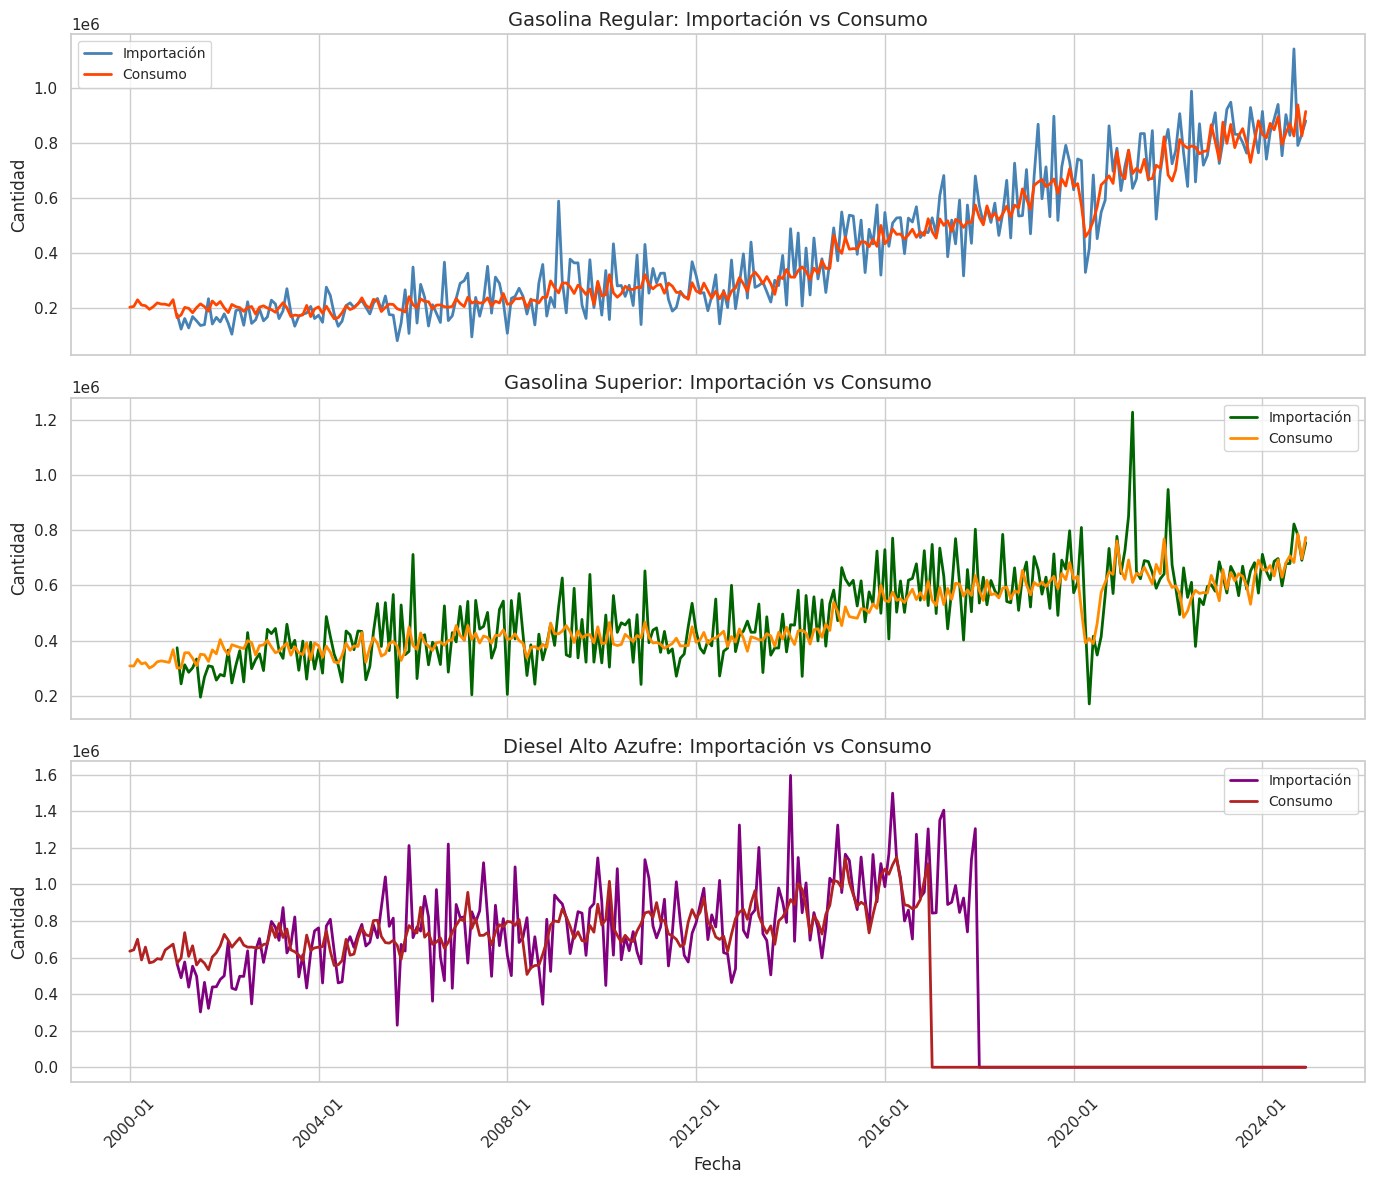

In [18]:
sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12, 'legend.fontsize': 10})

# Crear subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Fechas como eje x común
date_format = mdates.DateFormatter('%Y-%m')

# -------- Gasolina regular --------
axes[0].plot(df_importacion['Fecha'], df_importacion['Gasolina regular'], label='Importación', color='steelblue', linewidth=2)
axes[0].plot(df_consumo['Fecha'], df_consumo['Gasolina regular'], label='Consumo', color='orangered', linewidth=2)
axes[0].set_title('Gasolina Regular: Importación vs Consumo')
axes[0].set_ylabel('Cantidad')
axes[0].legend()
axes[0].xaxis.set_major_formatter(date_format)

# -------- Gasolina superior --------
axes[1].plot(df_importacion['Fecha'], df_importacion['Gasolina superior'], label='Importación', color='darkgreen', linewidth=2)
axes[1].plot(df_consumo['Fecha'], df_consumo['Gasolina superior'], label='Consumo', color='darkorange', linewidth=2)
axes[1].set_title('Gasolina Superior: Importación vs Consumo')
axes[1].set_ylabel('Cantidad')
axes[1].legend()
axes[1].xaxis.set_major_formatter(date_format)

# -------- Diesel --------
axes[2].plot(df_importacion['Fecha'], df_importacion['Diesel alto azufre'], label='Importación', color='purple', linewidth=2)
axes[2].plot(df_consumo['Fecha'], df_consumo['Diesel alto azufre'], label='Consumo', color='firebrick', linewidth=2)
axes[2].set_title('Diesel Alto Azufre: Importación vs Consumo')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Cantidad')
axes[2].legend()
axes[2].xaxis.set_major_formatter(date_format)

# Rotar fechas y ajustar espacio
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El gráfico de "Gasolina Regular: Importación vs Consumo" muestra una clara tendencia al alza tanto en la importación (línea azul) como en el consumo (línea naranja) de gasolina regular a lo largo del tiempo, desde el año 2000 hasta principios de 2024. Ambas series de tiempo siguen un patrón similar, con picos y valles que suelen coincidir, lo que sugiere una estrecha relación entre la cantidad de gasolina regular que se importa y la que se consume. La línea de importación tiende a ser un poco más volátil, presentando fluctuaciones más marcadas que el consumo, el cual parece ser una versión más suavizada de la importación. Esto podría indicar que las importaciones se ajustan proactivamente a la demanda anticipada, o que el consumo es más estable debido a la acumulación de inventarios o a la regularización de la demanda por otros medios. Se observa un crecimiento sostenido en la demanda y oferta de gasolina regular a lo largo de las dos décadas representadas.

En el gráfico de "Gasolina Superior: Importación vs Consumo", también se observa una tendencia general de crecimiento tanto en la importación (línea verde) como en el consumo (línea naranja) de gasolina superior desde el año 2000 hasta el 2024. Al igual que con la gasolina regular, existe una fuerte correlación visual entre las dos series, donde el consumo sigue de cerca las tendencias de la importación. Sin embargo, la volatilidad en la importación de gasolina superior parece ser más pronunciada en ciertos períodos, con picos y caídas más abruptos que en el caso de la gasolina regular. Esto podría deberse a factores de mercado más específicos, cambios en las políticas de importación o fluctuaciones en la demanda estacional de gasolina superior. A pesar de estas fluctuaciones, la tendencia subyacente de crecimiento en el consumo se mantiene, lo que indica una demanda creciente de este tipo de combustible.

El gráfico de "Diesel Alto Azufre: Importación vs Consumo" presenta un comportamiento más errático y notablemente diferente hacia el final del período. Desde el año 2000 hasta aproximadamente 2016, la importación (línea morada) y el consumo (línea roja) de diésel alto azufre muestran una correlación, aunque con mayor volatilidad en la importación. Hay periodos donde la importación es significativamente mayor que el consumo, y viceversa. Sin embargo, a partir de finales de 2016, la línea de consumo de diésel alto azufre cae abruptamente a cero y se mantiene en ese nivel, mientras que la importación continúa con fluctuaciones. Esta caída repentina del consumo a cero, mientras la importación sigue activa, es un punto crítico que sugiere un cambio fundamental en los datos o en la dinámica del mercado. Podría indicar una interrupción en la recopilación de datos de consumo, un cambio normativo que prohíbe o restringe severamente el consumo de diésel alto azufre (por ejemplo, por regulaciones ambientales que favorecen el diésel de bajo azufre), o un cambio en la clasificación o reporte del combustible. Este punto requiere una investigación más profunda para entender la discrepancia.

## Series para las diferentes gasolinas

### Gasolina regular

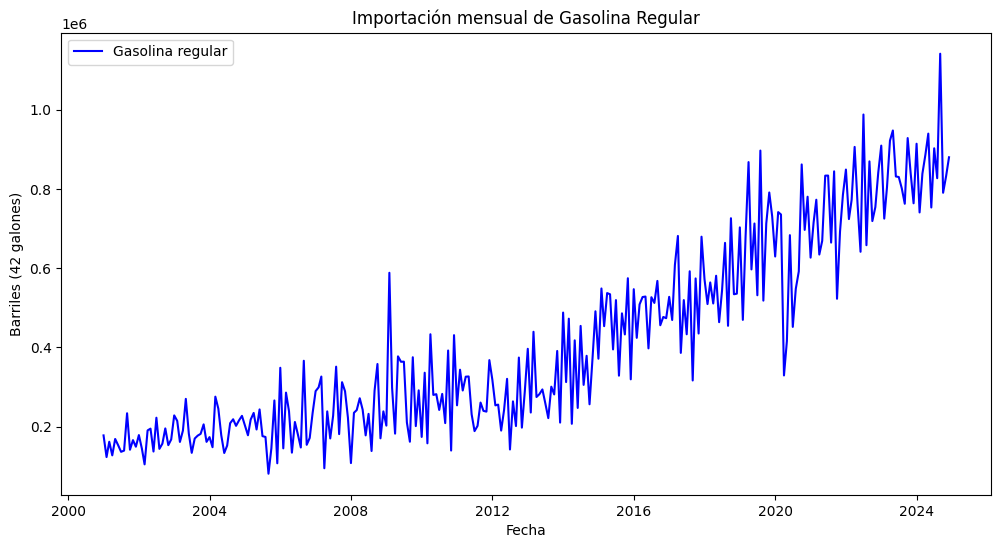

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Gasolina regular'], color='blue', label='Gasolina regular')
plt.title("Importación mensual de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


- Claramente se observa una tendencia creciente a lo largo de los años.

- Desde niveles iniciales cercanos a ~150,000–200,000 barriles mensuales en 2001 hasta valores superiores al millón de barriles en 2024.

- Esto indica que la media de la serie no es constante: no es estacionaria en media.

- Esta tendencia probablemente está asociada al crecimiento vehicular a lo largo de los años

Evolución por año
- La serie muestra aumentos paulatinos, sin caídas prolongadas que rompan la tendencia general.
- Los que si se perciben son algunos picos muy notables y caídas en torno a 2008 (crisis financiera global) y entre 2020–2021 (pandemia).

Gasolina superior

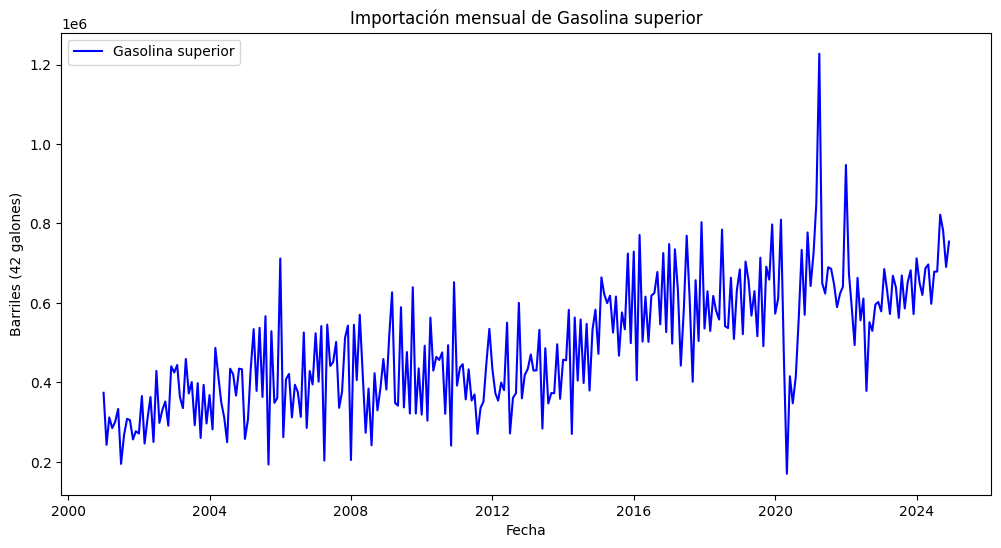

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Gasolina superior'], color='blue', label='Gasolina superior')
plt.title("Importación mensual de Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La tendencia a lo largo del tiempo no es tan clara como en gasolina regular.

- Desde 2001 hasta ~2018 hay una ligera tendencia creciente, aunque con bastante variabilidad mensual.

- Después de 2018 la tendencia parece más plana, incluso con caídas abruptas en ciertos momentos.

- Esto sugiere que la media no es constante, pero tampoco muestra un crecimiento sostenido tan fuerte como la regular.

Evolucion por año
- Hasta 2019 hay una relativa estabilidad con variaciones normales.

- En 2020–2021 se observa un pico muy abrupto seguido por una caída drástica y una recuperación parcial posterior.

- Después de 2021 las importaciones no vuelven a los máximos previos, lo cual sugiere un cambio estructural en el consumo o las políticas de importación de gasolina superior.

Diesel alto azufre

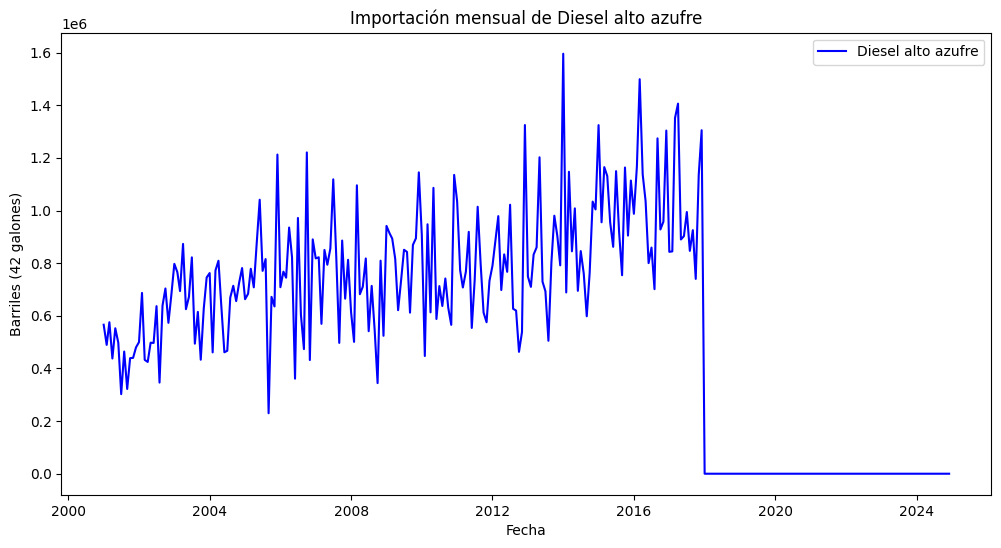

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Diesel alto azufre'], color='blue', label='Diesel alto azufre')
plt.title("Importación mensual de Diesel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La serie muestra una clara tendencia creciente desde 2001 hasta aproximadamente 2008–2010, alcanzando niveles por encima de 1.2–1.5 millones de barriles.

- Después de 2010, la serie muestra fluctuaciones altas pero no un crecimiento sostenido.

- A partir de 2018–2019 la serie cae abruptamente a cero y permanece ahí hasta 2024.

Evolucion por año 

- La serie es bastante volátil entre 2004 y 2015, con varios picos y caídas abruptas.

- Desde 2018 en adelante la importación cae a cero y no se recupera en absoluto, investigando un poco de por que es esto es que dice que este cambio se implementó para cumplir con estándares ambientales y proteger los motores modernos. 


#### Consumo mensual

Gasolina regular

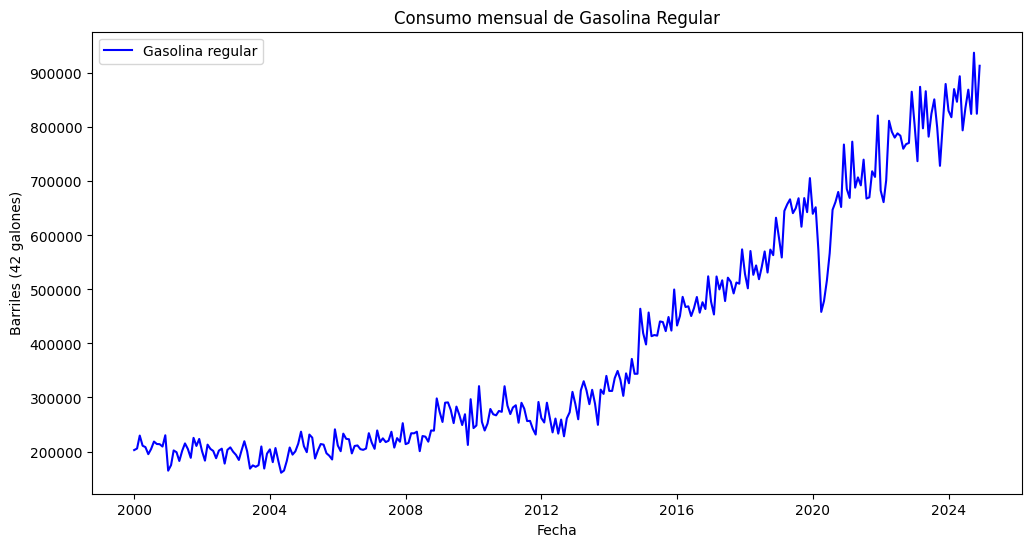

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Gasolina regular'], color='blue', label='Gasolina regular')
plt.title("Consumo mensual de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


- La serie muestra una tendencia creciente clara y sostenida a lo largo de los años.

- Desde niveles de ~200,000 barriles en 2001 hasta más de 900,000 barriles hacia 2024.

- Esta tendencia implica que la media no es constante: no estacionaria en media.

- El patrón ascendente coincide con el crecimiento de poblacion por ende de vehiculos tambien. 

Evolucion por año 
- Hasta ~2015 la serie crece lentamente.

- Después de 2015 el crecimiento se acelera notablemente.

- En 2020–2021 (años de pandemia) hay una caída abrupta en medio de la tendencia creciente, seguida de recuperación rápida y continuidad de la tendencia ascendente.


Gasolina superior

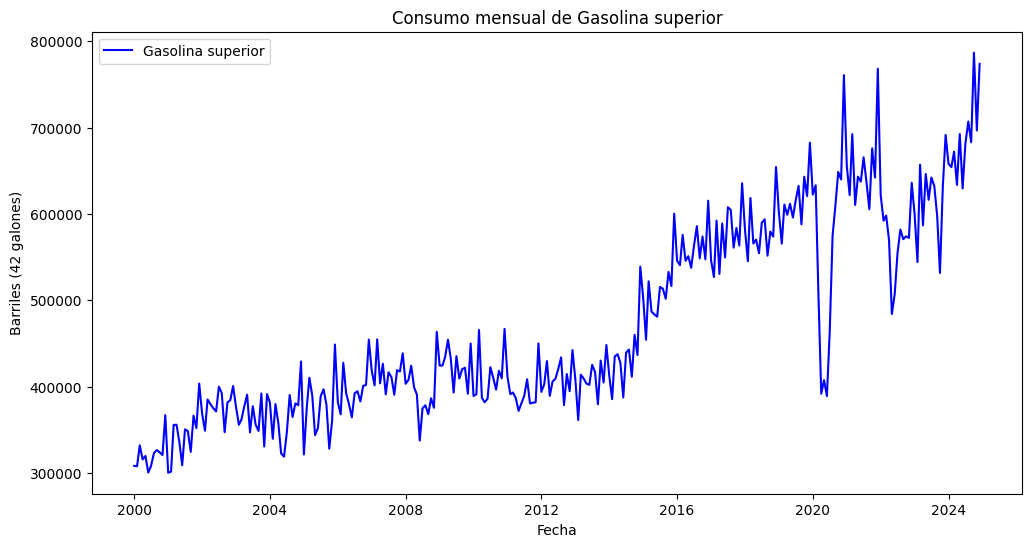

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Gasolina superior'], color='blue', label='Gasolina superior')
plt.title("Consumo mensual de Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

Diesel alto azufre

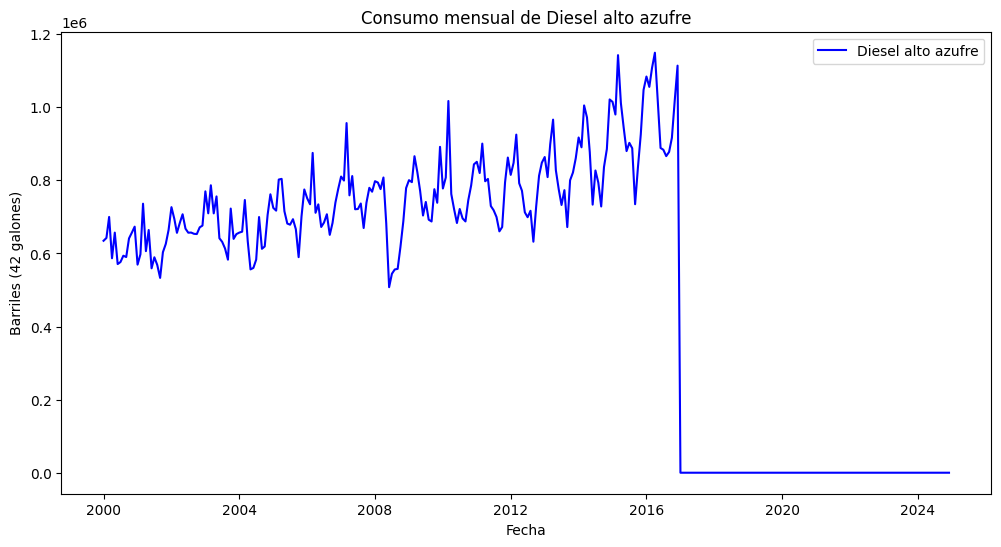

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Diesel alto azufre'], color='blue', label='Diesel alto azufre')
plt.title("Consumo mensual de Diesel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

## Serie 